<a href="https://colab.research.google.com/github/HarshRathiii/my-project/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import files
import pandas as pd
import io
# Upload the CSV file
uploaded = files.upload()

# Get the file name from the uploaded files
file_name = list(uploaded.keys())[0]




Saving GOOG.csv to GOOG.csv


In [4]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Choose the columns you want to use as features and target
feature_columns = ['open', 'high', 'low', 'volume']
target_column = 'close'

# Extract features (X) and target (y)
X = df[feature_columns].values
y = df[target_column].values



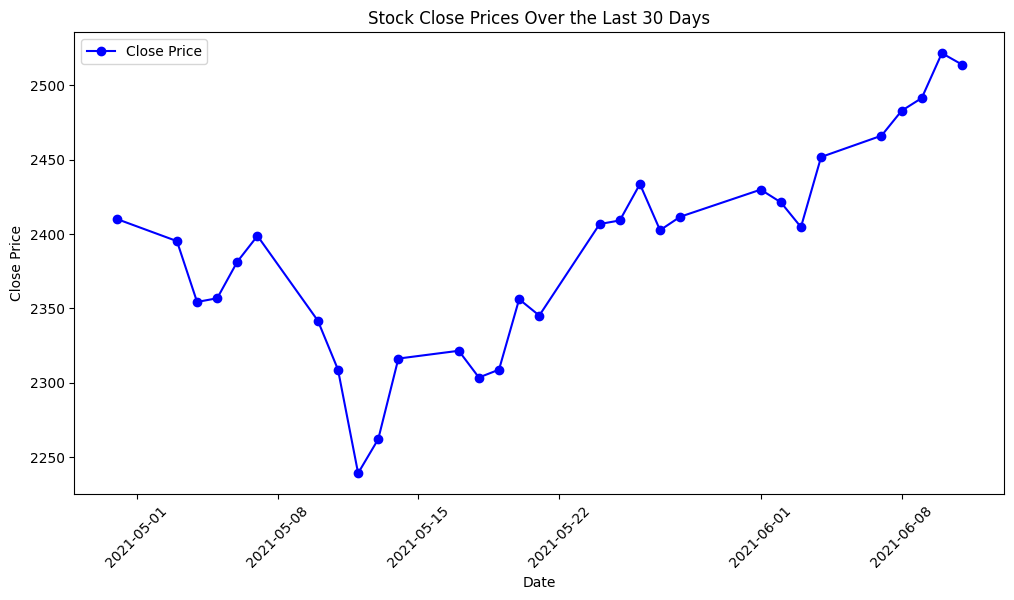

In [5]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has a 'Date' column
df['date'] = pd.to_datetime(df['date'])  # Convert 'Date' column to datetime format

# Filter data for the last 30 days
last_30_days = df.tail(30)

# Plotting the closing prices over the last 30 days
plt.figure(figsize=(12, 6))
plt.plot(last_30_days['date'], last_30_days['close'], label='Close Price', color='blue', marker='o')
plt.title('Stock Close Prices Over the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [6]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_normalized = scaler.fit_transform(X)
y_normalized = scaler.fit_transform(y.reshape(-1, 1))



In [7]:
# Create sequences for RNN
seq_length = 5
X_sequences, y_sequences = [], []
for i in range(len(X_normalized) - seq_length):
    X_sequences.append(X_normalized[i:i + seq_length])
    y_sequences.append(y_normalized[i + seq_length])

# Convert both X_sequences and y_sequences to numpy arrays
X_sequences, y_sequences = np.array(X_sequences), np.array(y_sequences)

# Reshape X_sequences to have 3 dimensions
X_sequences = X_sequences.reshape(-1, seq_length, len(feature_columns))

# Reshape y_sequences to have 2 dimensions
y_sequences = y_sequences.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)



In [10]:
# Build Vanilla RNN model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=50, activation='relu', input_shape=(seq_length, len(feature_columns))))
model_rnn.add(Dense(units=1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])



In [11]:
# Train the model
history_rnn = model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss_rnn = model_rnn.evaluate(X_test, y_test)
print(f"Vanilla RNN - Loss: {loss_rnn}")

Epoch 1/50
32/32 [==============================] - 7s 15ms/step - loss: 0.0329 - mean_absolute_error: 0.1199 - val_loss: 0.0019 - val_mean_absolute_error: 0.0319
Epoch 2/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0010 - mean_absolute_error: 0.0230 - val_loss: 5.3774e-04 - val_mean_absolute_error: 0.0169
Epoch 3/50
32/32 [==============================] - 0s 8ms/step - loss: 4.3758e-04 - mean_absolute_error: 0.0159 - val_loss: 4.0793e-04 - val_mean_absolute_error: 0.0147
Epoch 4/50
32/32 [==============================] - 0s 8ms/step - loss: 3.4600e-04 - mean_absolute_error: 0.0138 - val_loss: 3.4670e-04 - val_mean_absolute_error: 0.0128
Epoch 5/50
32/32 [==============================] - 0s 8ms/step - loss: 3.0172e-04 - mean_absolute_error: 0.0125 - val_loss: 3.1611e-04 - val_mean_absolute_error: 0.0124
Epoch 6/50
32/32 [==============================] - 0s 7ms/step - loss: 2.6913e-04 - mean_absolute_error: 0.0118 - val_loss: 3.0435e-04 - val_mean_absolute_error

8/8 [==============================] - 0s 3ms/step


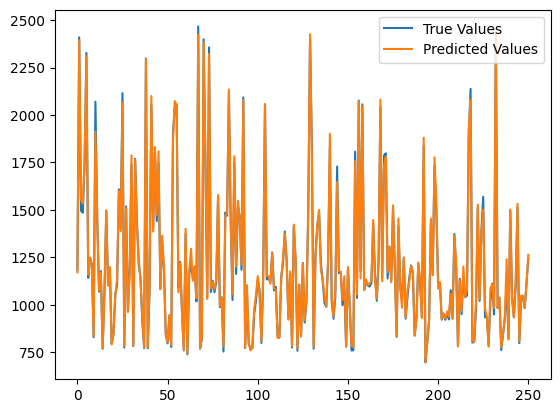

In [12]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model_rnn.predict(X_test)

# Inverse transform the scaled values to the original scale
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Plot the predictions versus the actual values
plt.plot(y_test_original, label='True Values')
plt.plot(y_pred_original, label='Predicted Values')
plt.legend()
plt.show()


In [14]:
from tensorflow.keras.layers import LSTM

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, activation='relu', input_shape=(seq_length, len(feature_columns))))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])



In [15]:
# Reshape input for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], seq_length, len(feature_columns)))
X_test_lstm = X_test.reshape((X_test.shape[0], seq_length, len(feature_columns)))



In [17]:
# Train the model
history_lstm = model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test)
print(f"LSTM - Loss: {loss_lstm}")




Epoch 1/50
32/32 [==============================] - 1s 27ms/step - loss: 2.1077e-04 - mean_absolute_error: 0.0104 - val_loss: 2.3776e-04 - val_mean_absolute_error: 0.0105
Epoch 2/50
32/32 [==============================] - 1s 25ms/step - loss: 2.0605e-04 - mean_absolute_error: 0.0101 - val_loss: 2.1677e-04 - val_mean_absolute_error: 0.0100
Epoch 3/50
32/32 [==============================] - 1s 26ms/step - loss: 2.2616e-04 - mean_absolute_error: 0.0109 - val_loss: 2.2268e-04 - val_mean_absolute_error: 0.0100
Epoch 4/50
32/32 [==============================] - 1s 24ms/step - loss: 1.9997e-04 - mean_absolute_error: 0.0100 - val_loss: 2.2354e-04 - val_mean_absolute_error: 0.0100
Epoch 5/50
32/32 [==============================] - 0s 14ms/step - loss: 2.1784e-04 - mean_absolute_error: 0.0105 - val_loss: 2.2738e-04 - val_mean_absolute_error: 0.0101
Epoch 6/50
32/32 [==============================] - 0s 13ms/step - loss: 2.0683e-04 - mean_absolute_error: 0.0102 - val_loss: 2.8257e-04 - val_me

8/8 [==============================] - 0s 3ms/step


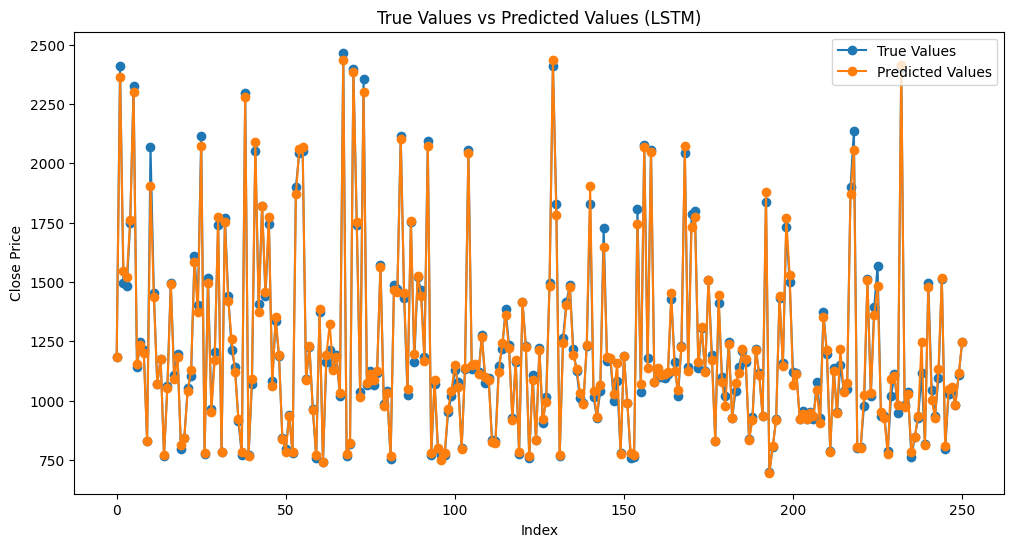

In [13]:
# Get predictions for the test set
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Inverse transform the normalized predictions and true values
y_pred_lstm_actual = scaler.inverse_transform(y_pred_lstm)
y_test_actual = scaler.inverse_transform(y_test)

# Plot true values vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='True Values', marker='o')
plt.plot(y_pred_lstm_actual, label='Predicted Values', marker='o')
plt.title('True Values vs Predicted Values (LSTM)')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

